<a href="https://colab.research.google.com/github/sanjayvarijanji/SANJAY-VEDIC.DATA/blob/main/notebook5e0628307f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-olympic-games/athlete_events_data_dictionary.csv
/kaggle/input/data-olympic-games/country_definitions.csv
/kaggle/input/data-olympic-games/athlete_events.csv
/kaggle/input/data-olympic-games/country_definitions_data_dictionary.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


In [ ]:
athletes_data = pd.read_csv('../input/data-olympic-games/athlete_events.csv')


countries_data = pd.read_csv('../input/data-olympic-games/country_definitions.csv')

In [ ]:
df = athletes_data.merge(countries_data, how = 'left', on = 'NOC')

In [ ]:
countries_data.duplicated().sum()


0

In [ ]:
df.rename(columns = {'region': 'Region', 'notes' : 'Notes'}, inplace = True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


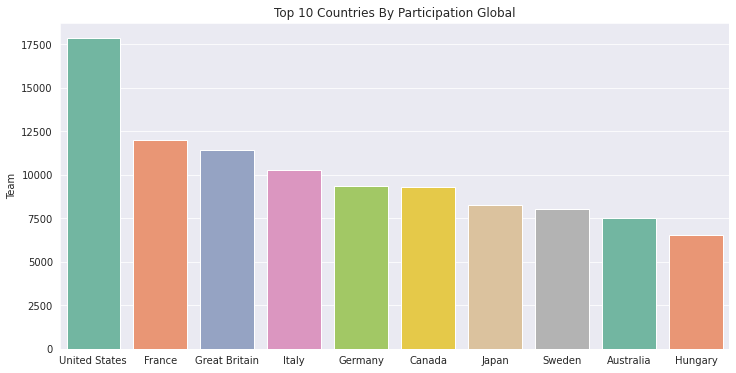

In [ ]:
top_10_countries = df.Team.value_counts().sort_values(ascending=False).head(10)
#top_10_countries
plt.figure(figsize = (12,6))
plt.title('Top 10 Countries By Participation Global')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Set2');

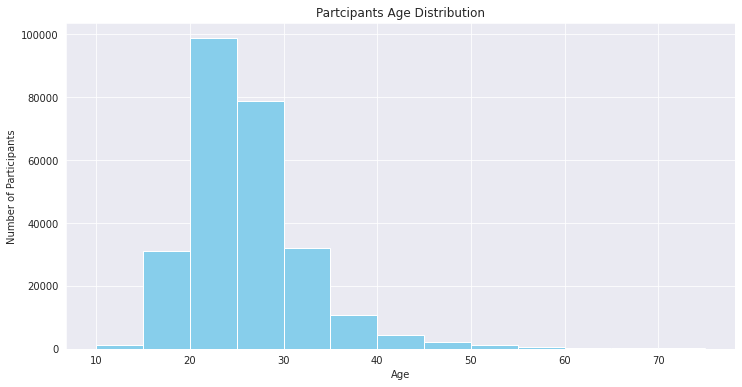

In [ ]:
# AGE DISTRIBUTION OF PARTICIPANTS.
plt.figure(figsize=(12,6))
plt.title('Partcipants Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(df.Age, bins = np.arange(10, 80, 5), color = 'SkyBlue', edgecolor = 'white');


In [ ]:
age_data = df.groupby(['Region','Age'], as_index = False).agg(
                                                counts = pd.NamedAgg(column = 'ID', aggfunc = 'count'))
age_data.sort_values(by = 'Age', ascending=True) 



,Region,Age,counts
1939,Greece,10.0,1
4588,Spain,11.0,1
5116,UK,11.0,2
4513,South Africa,11.0,1
2417,Italy,11.0,1
...,...,...,...
1796,France,81.0,1
5179,UK,84.0,1
5243,USA,88.0,3
5244,USA,96.0,1


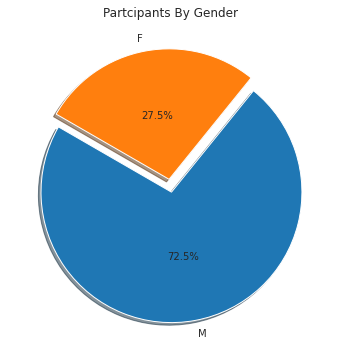

In [ ]:
# Pie Plot for Male and Female Participants
gender_counts = df.Sex.value_counts()
#gender_counts
plt.figure(figsize=(12,6))
plt.title('Partcipants By Gender')
plt.pie(gender_counts, labels =  gender_counts.index, autopct = '%1.1f%%', explode=[0.05]*2, 
                                        startangle = 150,pctdistance=0.5, shadow = True);


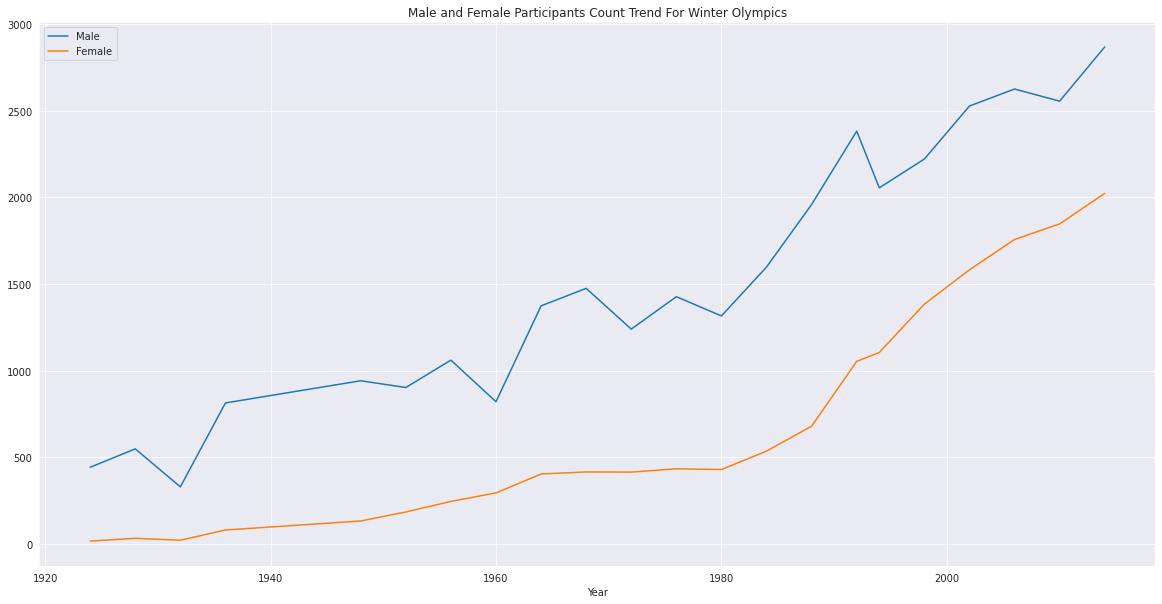

In [ ]:
# Participations Trend By Gender for Winter Olympics
#women_athletes = df[(df.Sex == 'F') & (df.Season == 'Winter')]
gender_participants = df[df.Season == 'Winter']
part = gender_participants.groupby('Year')['Sex'].value_counts()

plt.figure(figsize=(20,10))
part.loc[:, 'M'].plot(label = 'Male')
part.loc[:, 'F'].plot(label = 'Female')
plt.legend(loc="upper left")
plt.title('Male and Female Participants Count Trend For Winter Olympics');


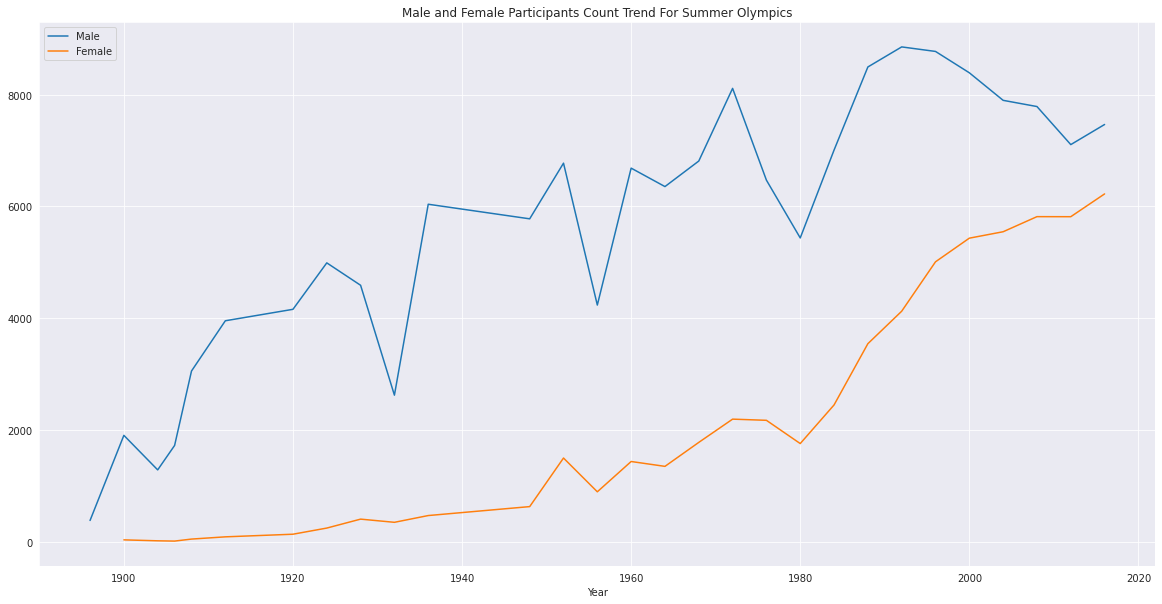

In [ ]:
# Participations Trend By Gender for Summer Olympics

gender_participants = df[df.Season == 'Summer']
part = gender_participants.groupby('Year')['Sex'].value_counts()

plt.figure(figsize=(20,10))
part.loc[:, 'M'].plot(label = 'Male')
part.loc[:, 'F'].plot(label = 'Female')
plt.legend(loc="upper left")
plt.title('Male and Female Participants Count Trend For Summer Olympics');
